# Notebook con el código de los plots del informe 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

df_epsilons = pd.read_csv("../csv/expEpsilon3.csv")
df_metricas = pd.read_csv("../csv/clases_metricas_eps.csv")
df_knn_alphas = pd.read_csv("../csv/5-fold_KyAlpha.csv").sort_values('alpha')
df_knn_alphas["epsilon"] = df_knn_alphas['epsilon'].astype('str')
df_kNN = pd.read_csv("../csv/4-fold_VotPes_kNN.csv").sort_values('k')
df_pca_alphas = pd.read_csv("../csv/3-fold_Alphas.csv").sort_values('alpha')
df_cm_knn = pd.read_csv("../csv/mdc_knn.csv")
df_cm_pca = pd.read_csv("../csv/mdc_pca.csv")
df_alpha_tiempo = pd.read_csv("../csv/alphavstiempo_df.csv")

Primer plot: Epsilons. Este es el plot de epsilons x tiempo. 

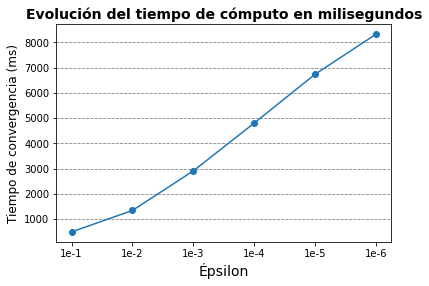

In [3]:
# Primer plot: Epsilons
fig, ax = plt.subplots()
mls = df_epsilons['msconv']
ep = [f'1e-{i}' for i in range(1, 7)]
acc = df_epsilons['accuracy']

ax.plot(ep, mls, label = 'fold1', marker = 'o')
ax.set_xticks(ep)
ax.set_xlabel("Épsilon", fontdict = {'fontsize':14})
ax.set_ylabel("Tiempo de convergencia (ms)", fontdict = {'fontsize':12})
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.set_title('Evolución del tiempo de cómputo en milisegundos', fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.show()

Epsilons x Accuracy

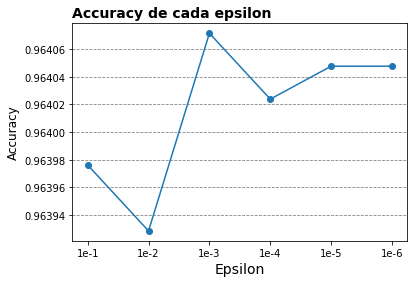

In [4]:
fig, ax = plt.subplots()
ax.plot(ep, acc, label = 'fold1', marker = 'o')
ax.set_xticks(ep)
ax.set_xlabel("Epsilon", fontdict = {'fontsize':14})
ax.set_ylabel("Accuracy", fontdict = {'fontsize':12})
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.set_title('Accuracy de cada epsilon', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.show()

Segundo Plot: k y alpha

In [7]:
# Las diferentes accuracies agrupadas por criterio de decision
print(df_kNN.groupby(['vot_pes', 'k']).mean())

           pca  alpha   epsilon  duracion       acc       std
vot_pes k                                                    
0       1  0.0   25.0  0.000001       0.0  0.965619  0.001908
        2  0.0   25.0  0.000001       0.0  0.958143  0.001217
        3  0.0   25.0  0.000001       0.0  0.966190  0.002389
        4  0.0   25.0  0.000001       0.0  0.964405  0.002306
        5  0.0   25.0  0.000001       0.0  0.965190  0.001971
        6  0.0   25.0  0.000001       0.0  0.964071  0.002137
        7  0.0   25.0  0.000001       0.0  0.964071  0.002372
        8  0.0   25.0  0.000001    1592.0  0.963071  0.002456
1       1  0.0   25.0  0.000001       0.0  0.965619  0.001908
        2  0.0   25.0  0.000001       0.0  0.965619  0.001908
        3  0.0   25.0  0.000001       0.0  0.962810  0.001112
        4  0.0   25.0  0.000001       0.0  0.959548  0.001099
        5  0.0   25.0  0.000001       0.0  0.956952  0.000683
        6  0.0   25.0  0.000001       0.0  0.954810  0.000874
        

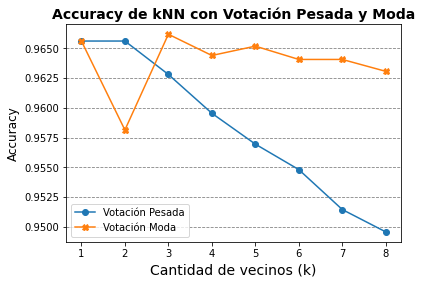

In [6]:
fig, ax = plt.subplots()

acc_vp = df_kNN[df_kNN['vot_pes']==1]['acc']
acc_notvp = df_kNN[df_kNN['vot_pes']==0]['acc']
k = df_kNN['k'].unique()

ax.plot(k, acc_vp, label = 'Votación Pesada', marker = 'o')
ax.plot(k, acc_notvp, label = 'Votación Moda', marker = 'X')
ax.set_xticks(k)
ax.set_xlabel("Cantidad de vecinos (k)", fontdict = {'fontsize':14})
ax.set_ylabel("Accuracy", fontdict = {'fontsize':12})
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.set_title('Accuracy de kNN con Votación Pesada y Moda', fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.legend()
plt.show()

Standard Deviation de votacion pesada y no pesada

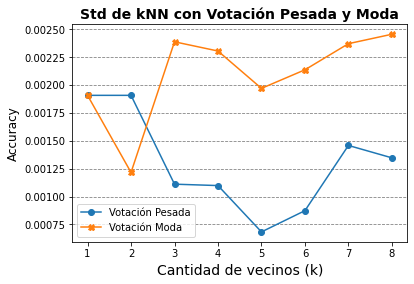

In [8]:
fig, ax = plt.subplots()
ax.plot(k, std_vp, label = 'Votación Pesada', marker = 'o')
ax.plot(k, std_notvp, label = 'Votación Moda', marker = 'X')
ax.set_xticks(k)
ax.set_xlabel("Cantidad de vecinos (k)", fontdict = {'fontsize':14})
ax.set_ylabel("Accuracy", fontdict = {'fontsize':12})
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.set_title('Std de kNN con Votación Pesada y Moda', fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.legend()
plt.show()

Accuracies con diferentes alphas para 2 k diferentes y 5-folds

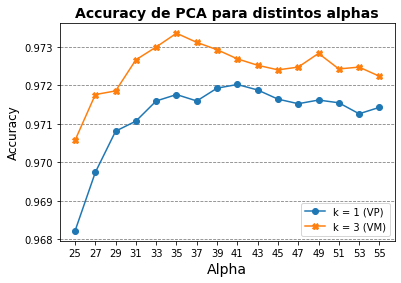

In [9]:
fig, ax = plt.subplots()
acc_vp = df_knn_alphas[(df_knn_alphas['vot_pes']==1) & (df_knn_alphas['k']==1)]['acc']
acc_notvp = df_knn_alphas[(df_knn_alphas['vot_pes']==0) & (df_knn_alphas['k']==3)]['acc']
alphas = df_knn_alphas['alpha'].unique()

ax.plot(alphas, acc_vp, label = 'k = 1 (VP)', marker = 'o')
ax.plot(alphas, acc_notvp, label = 'k = 3 (VM)', marker = 'X')
ax.set_xticks(alphas)
ax.set_xlabel("Alpha", fontdict = {'fontsize':14})
ax.set_ylabel("Accuracy", fontdict = {'fontsize':12})
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.set_title('Accuracy de PCA para distintos alphas', fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.legend()
plt.show()

Accuracies con diferentes alphas para 2 k diferentes con 3 folds

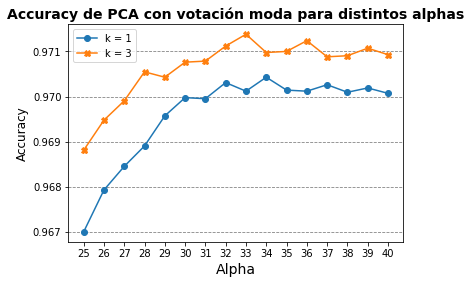

In [10]:
fig, ax = plt.subplots()
acc_vp = df_pca_alphas[df_pca_alphas['k']==1]['acc']
acc_notvp = df_pca_alphas[df_pca_alphas['k']==3]['acc']
alphas = df_pca_alphas['alpha'].unique()

ax.plot(alphas, acc_vp, label = 'k = 1', marker = 'o')
ax.plot(alphas, acc_notvp, label = 'k = 3', marker = 'X')
ax.set_xticks(alphas)
ax.set_xlabel("Alpha", fontdict = {'fontsize':14})
ax.set_ylabel("Accuracy", fontdict = {'fontsize':12})
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.set_title('Accuracy de PCA con votación moda para distintos alphas', fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.legend()
plt.show()

Matriz de confusión para kNN vs PCA

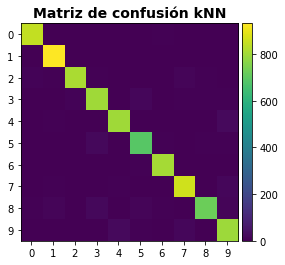

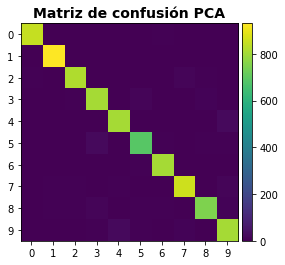

In [11]:
classes =  np.array([0,1,2,3,4,5,6,7,8,9])
cm_knn = confusion_matrix(df_cm_knn['test'], df_cm_knn['pred'])
cm_pca = confusion_matrix(df_cm_pca['test'], df_cm_pca['pred'])

# Matriz para kNN
ax = plt.subplot()
im = ax.imshow(cm_knn)
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10));
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax.set_title('Matriz de confusión kNN', fontdict = {'fontsize':14, 'fontweight':'bold'})

plt.colorbar(im, cax=cax)
plt.show()

#Matriz para PCA
ax = plt.subplot()
im = ax.imshow(cm_pca)
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10));
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax.set_title('Matriz de confusión PCA', fontdict = {'fontsize':14, 'fontweight':'bold'})

plt.colorbar(im, cax=cax)
plt.show()

Barplot de kNN y PCA para tiempo de ejecución

15.6
451.6


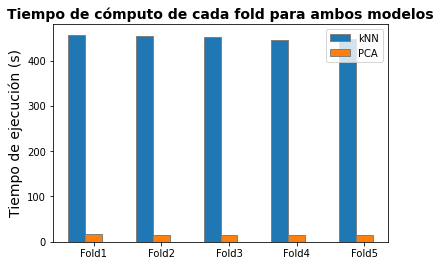

In [13]:
barWidth = 0.25

pca_segs = [17,16,15,15,15]
knn_segs = [457,455,453,445,448]

print(np.mean(pca_segs))
print(np.mean(knn_segs))

br1 = np.arange(len(pca_segs))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, knn_segs, width = barWidth,
        edgecolor ='grey', label ='kNN')
plt.bar(br2, pca_segs, width = barWidth,
        edgecolor ='grey', label ='PCA')
 
plt.ylabel('Tiempo de ejecución (s)', fontsize = 14)
plt.xticks([r + barWidth for r in range(len(pca_segs))],
        ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5'])
plt.title("Tiempo de cómputo de cada fold para ambos modelos", fontdict = {'fontsize':14, 'fontweight':'bold'})
 
plt.legend()
plt.show()

Alpha vs tiempo

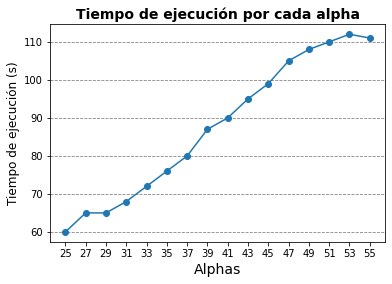

In [14]:
fig, ax = plt.subplots()
alpha = df_alpha_tiempo['alpha']
segs = df_alpha_tiempo['duracion']

ax.plot(alpha, segs, label = 'fold1', marker = 'o')
ax.set_xticks(alpha)
ax.set_xlabel("Alphas", fontdict = {'fontsize':14})
ax.set_ylabel("Tiempo de ejecución (s)", fontdict = {'fontsize':12})
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.set_title('Tiempo de ejecución por cada alpha', fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.show()